In [3]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [4]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [5]:
!cd yolov5 & pip install -r requirements.txt

In [6]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [7]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\7Lin/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-8-2 Python-3.10.9 torch-2.0.1+cu118 CUDA:0 (GeForce GTX 1650, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [8]:
model


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [9]:
img = 'siva.jpg'

In [10]:
results = model(img)
results.print()

image 1/1: 1280x1280 14 persons, 1 bowl
Speed: 71.6ms pre-process, 207.9ms inference, 58.1ms NMS per image at shape (1, 3, 640, 640)


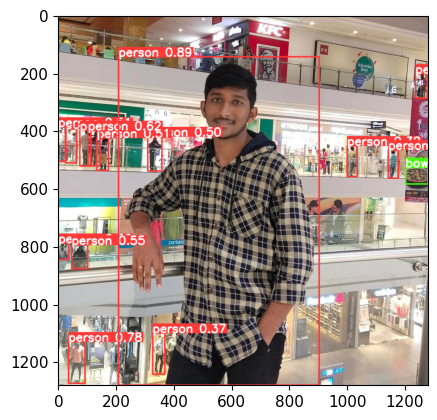

In [11]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [31]:
results.render()


[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [199, 197, 180],
         [203, 202, 186],
         [206, 205, 189]],
 
        [[255, 255, 251],
         [255, 255, 251],
         [255, 255, 251],
         ...,
         [202, 198, 179],
         [204, 202, 184],
         [206, 204, 186]],
 
        [[255, 255, 251],
         [255, 255, 251],
         [255, 255, 251],
         ...,
         [202, 198, 179],
         [202, 199, 181],
         [203, 200, 182]],
 
        ...,
 
        [[129, 134, 140],
         [132, 138, 144],
         [134, 140, 146],
         ...,
         [104, 106, 100],
         [108, 109, 105],
         [114, 115, 110]],
 
        [[128, 135, 142],
         [130, 138, 144],
         [132, 140, 146],
         ...,
         [105, 107, 101],
         [107, 108, 103],
         [112, 113, 108]],
 
        [[130, 138, 144],
         [131, 139, 145],
         [132, 140, 146],
         ...,
         [104, 107, 101],
  

In [32]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [14]:
import uuid   # Unique identifier
import os
import time

In [15]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [14]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [16]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.69d13544-33a7-11ee-8574-548d5a8d6caa.jpg


In [16]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname) 

data\images\awake.2afc1d9c-328e-11ee-8d39-548d5a8d6ca7.jpg
data\images\awake.2afc4493-328e-11ee-8169-548d5a8d6ca7.jpg
data\images\awake.2afc4494-328e-11ee-84ca-548d5a8d6ca7.jpg
data\images\awake.2afc4495-328e-11ee-8632-548d5a8d6ca7.jpg
data\images\awake.2afc4496-328e-11ee-8ea3-548d5a8d6ca7.jpg
data\images\awake.2afc4497-328e-11ee-8249-548d5a8d6ca7.jpg
data\images\awake.2afc4498-328e-11ee-bb74-548d5a8d6ca7.jpg
data\images\awake.2afc4499-328e-11ee-b7f2-548d5a8d6ca7.jpg
data\images\awake.2afc449a-328e-11ee-a9d5-548d5a8d6ca7.jpg
data\images\awake.2afc449b-328e-11ee-93ae-548d5a8d6ca7.jpg
data\images\awake.2afc449c-328e-11ee-b76a-548d5a8d6ca7.jpg
data\images\awake.2afc449d-328e-11ee-8d62-548d5a8d6ca7.jpg
data\images\awake.2afc449e-328e-11ee-a993-548d5a8d6ca7.jpg
data\images\awake.2afc449f-328e-11ee-8cfa-548d5a8d6ca7.jpg
data\images\awake.2afc44a0-328e-11ee-a46c-548d5a8d6ca7.jpg
data\images\awake.2afc44a1-328e-11ee-832b-548d5a8d6ca7.jpg
data\images\awake.2afc44a2-328e-11ee-9638-548d5a8d6ca7.j

In [17]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [18]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [5]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 50 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 1 commit. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-202-gf9f023a Python-3.10.9 torch-2.0.1+cu118 CUDA:0 (GeForce GTX 1650, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2

In [18]:

model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp7/weights/last.pt', force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\7Lin/.cache\torch\hub\master.zip
YOLOv5  2023-8-5 Python-3.10.9 torch-2.0.1+cu118 CUDA:0 (GeForce GTX 1650, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [26]:
img = os.path.join('data', 'images', 'drowsy.167e3a4d-328e-11ee-8a9c-548d5a8d6ca7.jpg')

In [27]:
results = model(img)

In [28]:
results.print()

image 1/1: 480x640 1 drowsy
Speed: 19.5ms pre-process, 15.3ms inference, 3.2ms NMS per image at shape (1, 3, 480, 640)


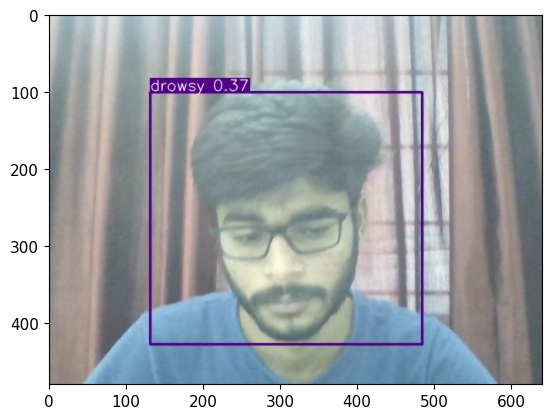

In [29]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [25]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [1]:
from sklearn.metrics import accuracy_score

ModuleNotFoundError: No module named 'sklearn'

In [2]:
!pip install sklearn

In [3]:
from sklearn.metrics import accuracy_score

ModuleNotFoundError: No module named 'sklearn'